# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [108]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:

agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
headers = {"User-Agent": agent}


In [110]:
base_url = "https://books.toscrape.com/catalogue/category/books_1/index.html"

In [111]:

url = base_url
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


In [112]:

books = soup.find_all('article', class_="product_pod")
libros = []
for book in books:
    title = book.find("h3").text
    price = book.find("p", class_="price_color").text.strip()
    price = price.replace("Â£", "")
    libros
    libros.append({'title': title,
                       'price': float(price)
                       })

libros

[{'title': 'A Light in the ...', 'price': 51.77},
 {'title': 'Tipping the Velvet', 'price': 53.74},
 {'title': 'Soumission', 'price': 50.1},
 {'title': 'Sharp Objects', 'price': 47.82},
 {'title': 'Sapiens: A Brief History ...', 'price': 54.23},
 {'title': 'The Requiem Red', 'price': 22.65},
 {'title': 'The Dirty Little Secrets ...', 'price': 33.34},
 {'title': 'The Coming Woman: A ...', 'price': 17.93},
 {'title': 'The Boys in the ...', 'price': 22.6},
 {'title': 'The Black Maria', 'price': 52.15},
 {'title': 'Starving Hearts (Triangular Trade ...', 'price': 13.99},
 {'title': "Shakespeare's Sonnets", 'price': 20.66},
 {'title': 'Set Me Free', 'price': 17.46},
 {'title': "Scott Pilgrim's Precious Little ...", 'price': 52.29},
 {'title': 'Rip it Up and ...', 'price': 35.02},
 {'title': 'Our Band Could Be ...', 'price': 57.25},
 {'title': 'Olio', 'price': 23.88},
 {'title': 'Mesaerion: The Best Science ...', 'price': 37.59},
 {'title': 'Libertarianism for Beginners', 'price': 51.33},
 {

In [113]:
datos = [(libro['title'], libro['price']) for libro in libros]

In [114]:
conexion = sqlite3.connect("libros.db")
cursor = conexion.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    precio TEXT NOT NULL
)
""")

In [115]:
cursor.executemany("INSERT INTO books (titulo, precio) VALUES (?, ?)", datos)


conexion.commit()
conexion.close()


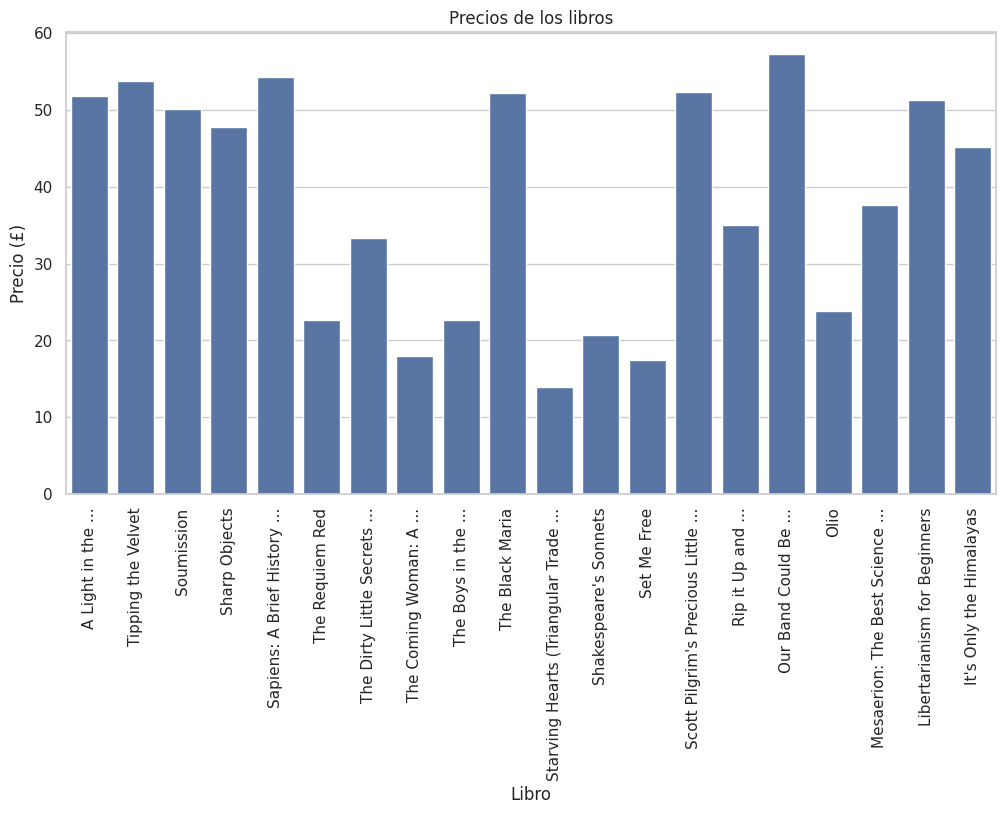

In [121]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.barplot(x="title", y="price", data=df)
plt.xticks(rotation=90)  
plt.title("Precios de los libros")
plt.ylabel("Precio (£)")
plt.xlabel("Libro")
plt.show()

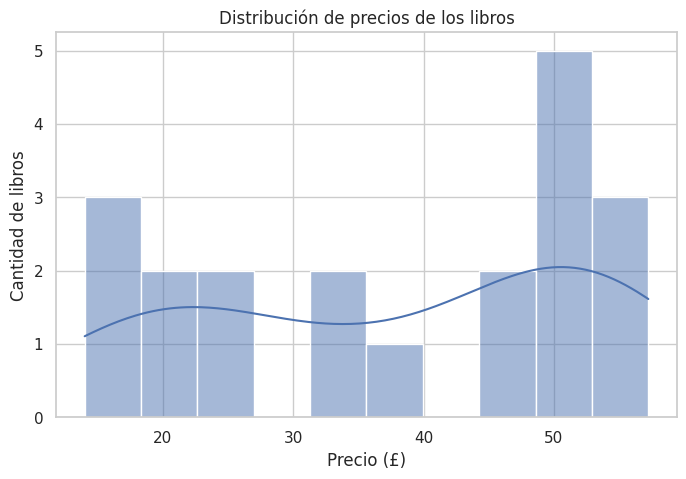

In [124]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=10, kde=True)
plt.title("Distribución de precios de los libros")
plt.xlabel("Precio (£)")
plt.ylabel("Cantidad de libros")
plt.show()

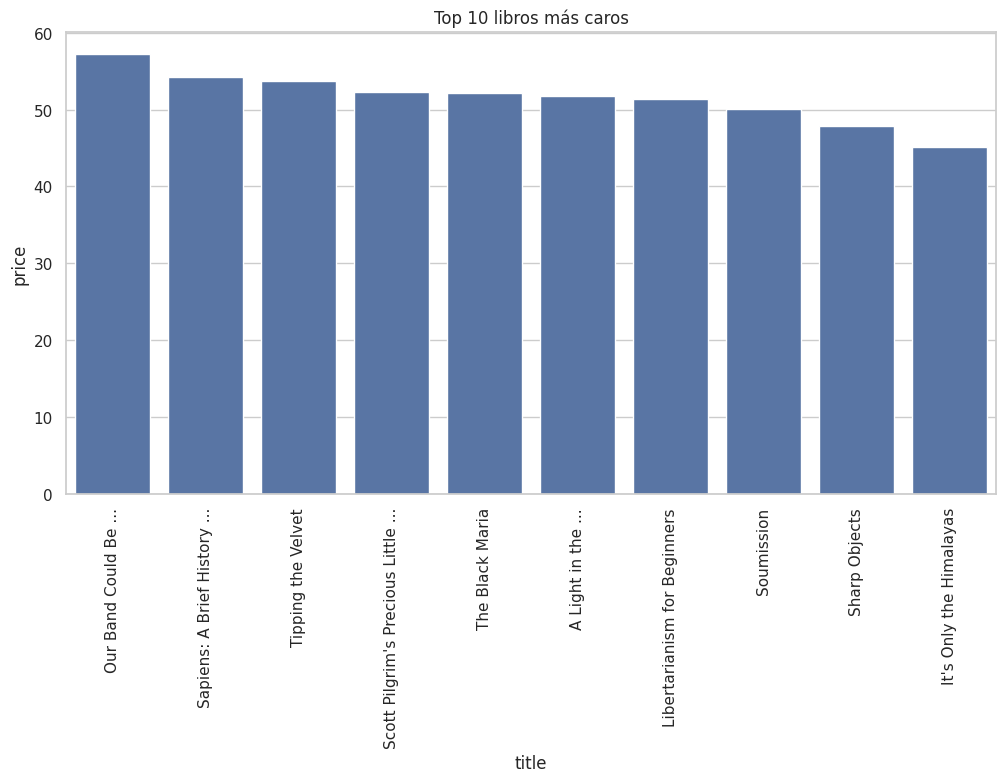

In [125]:
top10 = df.nlargest(10, "price")

plt.figure(figsize=(12,6))
sns.barplot(x="title", y="price", data=top10)
plt.xticks(rotation=90)
plt.title("Top 10 libros más caros")
plt.show()